# Classification Models

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nbimporter

import TrainTestEvalSplit as split

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

#Classification Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from yellowbrick.classifier import ClassPredictionError

import pickle

from sklearn.model_selection import KFold
from sklearn.utils import check_X_y
from sklearn.model_selection import RandomizedSearchCV

Importing Jupyter notebook from TrainTestEvalSplit.ipynb


## Import File

In [2]:
full_df = pd.read_csv("../../../Data_thesis/Full_Datasets/Full.csv")
full_df["Date"] = pd.to_datetime(full_df["Date"], format="%Y-%m-%d")

full_df.head()

,Date,Hour,weekday,is_weekend,Sensor,SensorLongitude,SensorLatitude,CrowdednessCount,LonScaled,LatScaled,...,Nieuwmarkt score,Nieuwmarkt weight,Nieuwezijds Kolk score,Nieuwezijds Kolk weight,Dam score,Dam weight,Spui score,Spui weight,Centraal Station score,Centraal Station weight
0,2018-03-11,100,6.0,1.0,GAWW-04,4.897908,52.373283,886,-0.558826,0.035969,...,0.000000,0.978944,0.000000,0.616678,-32.179221,-0.312420,-0.000000,-1.140386,297.734037,0.629459
1,2018-03-11,2100,6.0,1.0,GAWW-07,4.900441,52.374414,1603,1.966352,1.066966,...,396.612265,1.142975,5.596253,0.028122,-2008.443214,-1.585196,-370.823855,-2.767342,4117.774978,1.066781
2,2018-03-11,2100,6.0,1.0,GAWW-08,4.897193,52.371650,21,-1.271546,-1.452500,...,306.731105,0.883951,85.461513,0.429455,-107.617256,-0.084939,-71.079754,-0.530446,262.901130,0.068109
3,2018-03-11,2100,6.0,1.0,GAWW-09,4.898479,52.375040,88,0.011331,1.637575,...,299.730494,0.863777,135.285034,0.679824,-832.481652,-0.657049,-252.977149,-1.887889,3940.747665,1.020919
4,2018-03-11,2100,6.0,1.0,GAWW-10,4.898808,52.372369,49,0.338729,-0.797289,...,402.696352,1.160508,44.878993,0.225523,-918.302668,-0.724785,-187.014683,-1.395632,2000.274786,0.518206


## Train/Test/Eval

In [3]:
size = 0.9
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [4]:
full_df = split.clasCrowdednessCounts(full_df)

In [5]:
x_train, y_train, x_test, y_test, x_eval, y_eval, train_dates = split.trainTestSplit(full_df, size)

## Models

### Baseline
Implemented the [Sklearn Version](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html#sklearn.dummy.DummyClassifier)

#### Training

In [6]:
base = DummyClassifier(strategy="stratified", random_state=42)

In [7]:
labels = [1, 2, 3, 4]

mean_acc = 0

mean_precision = 0
mean_recall = 0
mean_f1_score = 0

for train_index, val_index in kf.split(train_dates):
    
    x_train_con, y_train_con = check_X_y(X=x_train[x_train["Date"].isin(train_dates[train_index])].drop(columns={"Date"}),
                                        y=y_train[y_train["Date"].isin(train_dates[train_index])]["CrowdednessCount"])
    base.fit(x_train_con,y_train_con)
    
    x_val_con, y_val_con = check_X_y(X=x_train[x_train["Date"].isin(train_dates[val_index])].drop(columns={"Date"}),
                                    y=y_train[y_train["Date"].isin(train_dates[val_index])]["CrowdednessCount"])
    
    y_pred_base = base.predict(x_val_con)
    
    mean_acc += accuracy_score(y_val_con, y_pred_base)

    mean_precision += precision_score(y_val_con, y_pred_base, average=None)
    mean_recall += recall_score(y_val_con, y_pred_base, average=None)
    mean_f1_score += f1_score(y_val_con, y_pred_base, average=None)

mean_acc = round(((mean_acc / 10) * 100),2)
mean_precision = (mean_precision / 10) * 100
mean_recall = (mean_recall / 10) * 100
mean_f1_score = (mean_f1_score / 10) * 100

print("Mean Accuracy Score: ", mean_acc, "\n")

for i in range(len(labels)):
    print("For label {0}".format(labels[i]))
    print("Mean Precision Score: ", round(mean_precision[i], 2))
    print("Mean Recall Score: ", round(mean_recall[i], 2))
    print("Mean F1 Score: ", round(mean_f1_score[i], 2), "\n")

Mean Accuracy Score:  24.87 

For label 1
Mean Precision Score:  24.76
Mean Recall Score:  24.49
Mean F1 Score:  24.6 

For label 2
Mean Precision Score:  24.96
Mean Recall Score:  25.37
Mean F1 Score:  25.16 

For label 3
Mean Precision Score:  24.95
Mean Recall Score:  24.29
Mean F1 Score:  24.54 

For label 4
Mean Precision Score:  24.99
Mean Recall Score:  25.49
Mean F1 Score:  25.11 



#### Test

Accuracy Score:  0.24257246376811595
              precision    recall  f1-score   support

           1       0.26      0.25      0.25      1375
           2       0.25      0.24      0.24      1434
           3       0.22      0.24      0.23      1341
           4       0.24      0.24      0.24      1370

   micro avg       0.24      0.24      0.24      5520
   macro avg       0.24      0.24      0.24      5520
weighted avg       0.24      0.24      0.24      5520



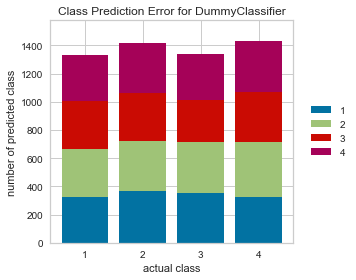

In [8]:
y_pred_test_base = base.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred_test_base))
print(classification_report(y_test, y_pred_test_base))

visualizer = ClassPredictionError(
    base
)

visualizer.fit(x_train.drop(columns={"Date"}), y_train["CrowdednessCount"])
visualizer.score(x_test, y_test)
g = visualizer.poof()

### Random Forrest Classifier 
Implemented the [Sklearn Version](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

#### Training

In [9]:
rfc = RandomForestClassifier()

In [10]:
labels = [1, 2, 3, 4]

mean_acc = 0

mean_precision = 0
mean_recall = 0
mean_f1_score = 0

for train_index, val_index in kf.split(train_dates):
    
    x_train_con, y_train_con = check_X_y(X=x_train[x_train["Date"].isin(train_dates[train_index])].drop(columns={"Date"}),
                                        y=y_train[y_train["Date"].isin(train_dates[train_index])]["CrowdednessCount"])
    rfc.fit(x_train_con,y_train_con)
    
    x_val_con, y_val_con = check_X_y(X=x_train[x_train["Date"].isin(train_dates[val_index])].drop(columns={"Date"}),
                                    y=y_train[y_train["Date"].isin(train_dates[val_index])]["CrowdednessCount"])
    
    y_pred_base = rfc.predict(x_val_con)
    
    mean_acc += accuracy_score(y_val_con, y_pred_base)

    mean_precision += precision_score(y_val_con, y_pred_base, average=None)
    mean_recall += recall_score(y_val_con, y_pred_base, average=None)
    mean_f1_score += f1_score(y_val_con, y_pred_base, average=None)

mean_acc = round(((mean_acc / 10) * 100),2)
mean_precision = (mean_precision / 10) * 100
mean_recall = (mean_recall / 10) * 100
mean_f1_score = (mean_f1_score / 10) * 100

print("Mean Accuracy Score: ", mean_acc, "\n")

for i in range(len(labels)):
    print("For label {0}".format(labels[i]))
    print("Mean Precision Score: ", round(mean_precision[i], 2))
    print("Mean Recall Score: ", round(mean_recall[i], 2))
    print("Mean F1 Score: ", round(mean_f1_score[i], 2), "\n")

D:\Programs\Anaconda\envs\Analytics\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean Accuracy Score:  85.8 

For label 1
Mean Precision Score:  84.41
Mean Recall Score:  84.94
Mean F1 Score:  84.65 

For label 2
Mean Precision Score:  82.9
Mean Recall Score:  79.55
Mean F1 Score:  81.18 

For label 3
Mean Precision Score:  86.43
Mean Recall Score:  87.44
Mean F1 Score:  86.92 

For label 4
Mean Precision Score:  89.1
Mean Recall Score:  91.32
Mean F1 Score:  90.18 



#### Hyperparameter Tuning

In [15]:
n_estimators = [100, 200, 300, 400, 500]
criterion = ["gini", "entropy"]
max_features = ["log2", "auto", None]
bootstrap = [True, False]
oob_score = [True, False]
class_weight = ["balanced", "balanced_subsample", None]

params = {"n_estimators": n_estimators,
         "criterion": criterion,
         "max_features": max_features,
         "bootstrap": bootstrap, 
         "oob_score": oob_score}

scores = ["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"]

In [16]:
hyp = RandomizedSearchCV(estimator=rfc, param_distributions=params, n_iter=10, scoring=scores, n_jobs=-1, cv=10,
                        random_state=42, refit=False)

In [17]:
best_model = hyp.fit(x_eval, y_eval)

KeyboardInterrupt: 

#### Test

Accuracy Score:  0.8608695652173913
              precision    recall  f1-score   support

           1       0.84      0.86      0.85      1375
           2       0.82      0.79      0.80      1434
           3       0.86      0.89      0.88      1341
           4       0.93      0.91      0.92      1370

   micro avg       0.86      0.86      0.86      5520
   macro avg       0.86      0.86      0.86      5520
weighted avg       0.86      0.86      0.86      5520



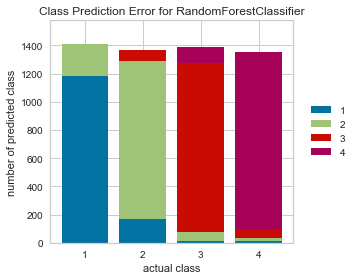

In [11]:
y_pred_test_rfc = rfc.predict(x_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred_test_rfc))
print(classification_report(y_test, y_pred_test_rfc))

visualizer = ClassPredictionError(
    rfc
)

visualizer.fit(x_train.drop(columns={"Date"}), y_train["CrowdednessCount"])
visualizer.score(x_test, y_test)
g = visualizer.poof()

#### Save Model to File

In [50]:
filename = "../../../Data_thesis/Models/rfc_model.sav"

pickle.dump(rfc, open(filename, 'wb'))

### XGBoost 
Implement [XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_intro.html)

#### Training

In [13]:
xgb = xgb.XGBClassifier(random_state=42, n_estimators=300, max_depth=12, 
                              learning_rate=0.1, booster="gbtree", n_jobs=50)

In [14]:
labels = [1, 2, 3, 4]

mean_acc = 0

mean_precision = 0
mean_recall = 0
mean_f1_score = 0

for train_index, val_index in kf.split(train_dates):
    
    xgb.fit(x_train[x_train["Date"].isin(train_dates[train_index])].drop(columns={"Date"}),
            y_train[y_train["Date"].isin(train_dates[train_index])]["CrowdednessCount"])
    
    y_pred_base = xgb.predict(x_train[x_train["Date"].isin(train_dates[val_index])].drop(columns={"Date"}))
    
    mean_acc += accuracy_score(y_train[y_train["Date"].isin(train_dates[val_index])]["CrowdednessCount"], y_pred_base)

    mean_precision += precision_score(y_train[y_train["Date"].isin(train_dates[val_index])]["CrowdednessCount"], y_pred_base, average=None)
    mean_recall += recall_score(y_train[y_train["Date"].isin(train_dates[val_index])]["CrowdednessCount"], y_pred_base, average=None)
    mean_f1_score += f1_score(y_train[y_train["Date"].isin(train_dates[val_index])]["CrowdednessCount"], y_pred_base, average=None)

mean_acc = round(((mean_acc / 10) * 100),2)
mean_precision = (mean_precision / 10) * 100
mean_recall = (mean_recall / 10) * 100
mean_f1_score = (mean_f1_score / 10) * 100

print("Mean Accuracy Score: ", mean_acc, "\n")

for i in range(len(labels)):
    print("For label {0}".format(labels[i]))
    print("Mean Precision Score: ", round(mean_precision[i], 2))
    print("Mean Recall Score: ", round(mean_recall[i], 2))
    print("Mean F1 Score: ", round(mean_f1_score[i], 2), "\n")

Mean Accuracy Score:  87.17 

For label 1
Mean Precision Score:  86.8
Mean Recall Score:  84.68
Mean F1 Score:  85.71 

For label 2
Mean Precision Score:  83.83
Mean Recall Score:  82.61
Mean F1 Score:  83.21 

For label 3
Mean Precision Score:  87.98
Mean Recall Score:  88.51
Mean F1 Score:  88.23 

For label 4
Mean Precision Score:  89.78
Mean Recall Score:  92.82
Mean F1 Score:  91.26 



#### Test

Accuracy Score:  0.8722826086956522
              precision    recall  f1-score   support

           1       0.85      0.85      0.85      1375
           2       0.82      0.80      0.81      1434
           3       0.89      0.90      0.89      1341
           4       0.93      0.94      0.94      1370

   micro avg       0.87      0.87      0.87      5520
   macro avg       0.87      0.87      0.87      5520
weighted avg       0.87      0.87      0.87      5520



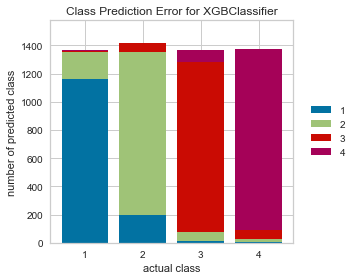

In [15]:
y_pred_test_xgb = xgb.predict(x_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred_test_xgb))
print(classification_report(y_test, y_pred_test_xgb))

visualizer = ClassPredictionError(
    xgb
)

visualizer.fit(x_train.drop(columns={"Date"}), y_train["CrowdednessCount"])
visualizer.score(x_test, y_test)
g = visualizer.poof()

#### Save Model to File

In [53]:
filename = "../../../Data_thesis/Models/xgbc_model.sav"

pickle.dump(xgb, open(filename, 'wb'))